# Programming Exercise 2: Logistic Regression

In this exercise, you will implement logistic regression and apply it to two different datasets.

## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

We have a dataset with historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you hae the applicant's scores on two exams and the admissions decision. 

Goal: build a classification model that estimates an applicant's probability of admission based on the scores from those two exams.

### 1.1 Visualizing the data

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
datadf = pd.read_csv('/Users/tess/Desktop/MachineLearning/machine-learning-ex2/ex2/ex2data1.txt', header = None, names = ['Exam1', 'Exam2', 'Accepted'])

In [31]:
datadf[1:10]

,Exam1,Exam2,Accepted
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


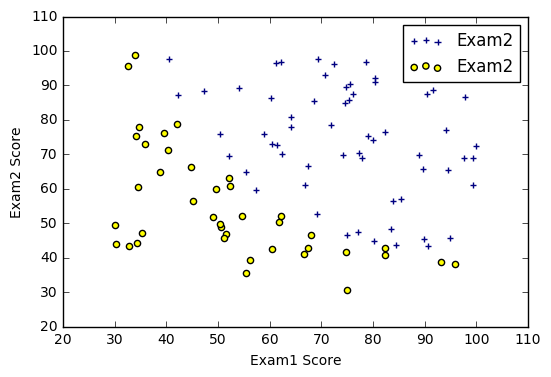

In [35]:
#datadf.plot(x = 'Exam1', y = 'Exam2', kind = 'scatter', c = 'Accepted')

# plot the data with two different marker types / colors

acc = datadf.loc[datadf['Accepted'] == 1]
den = datadf.loc[datadf['Accepted'] == 0]

plt.scatter(acc['Exam1'], acc['Exam2'], marker = '+', c = 'navy')   # accepted students
plt.scatter(den['Exam1'], den['Exam2'], marker = 'o', c = 'yellow') # denied students

plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(loc = 1)

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

The logistic regression hypothesis uses the sigmoid function: 1/(1+e^-z)

In [63]:

def sigmoid(x):
    sig = 1. / (1+ np.exp(-x))
    return sig


In [344]:
# test the sigmoid function:
# if nothing else, (from scipy.special import expit) should work

a = sigmoid(100)                   # for large positive x, sigmoid(x) ~= 1
b = sigmoid(-100)                # for large negative x, sigmoid(x) ~= 0
c = sigmoid(0)                     # sigmoid(0) = 0.5  

samp = np.array([[100], [-100], [0]])
d = sigmoid(samp)                  # sigmoid function should also work for arrays:

print a, b, c
print d

1.0 3.72007597602e-44 0.5
[[  1.00000000e+00]
 [  3.72007598e-44]
 [  5.00000000e-01]]


### 1.2.2 Cost function and gradient


In [465]:
data = np.loadtxt('/Users/tess/Desktop/MachineLearning/machine-learning-ex2/ex2/ex2data1.txt', delimiter = ',', usecols=(0,1,2),  unpack = True)

X = np.transpose(data[:-1])         # create array of exam scores
X = np.insert(X, 0, 1, axis = 1)    # insert colummn of '1s' for theta0 
y = np.transpose(data[-1:])         # create array of acceptance (Y/N) codes

theta = np.array([[0.],[0.],[0.]])  # initialize theta 

X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3, 1))

In [466]:

def logistCostFunction(theta, X, y):
    J = 0                           # initialize cost function as 0
    m = y.size
    h = sigmoid(np.dot(X, theta))

    J = -1*(1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return J

cost = logistCostFunction(theta, X, y)
cost

array([[ 0.69314718]])

In [206]:
def logistGradient(theta, X, y):
    grad = 0                        # initialize gradient as 0
    m = y.size
    h = sigmoid(np.dot(X, theta))
    grad = (1./m) * np.dot(X.T, (h - y))
    grad = grad.flatten()
    return grad

grad = logistGradient(theta, X, y )
grad

array([ -0.1       , -12.00921659, -11.26284221])

### 1.2.3 Learning parameters using scipy fmin

Instead of using gradient descent, let's try using automated parameter optimization.

It's not clear which method Octave's 'fminunc' utilizes, so I'll just use scipy's generic fmin

In [215]:
from scipy import optimize

def learnParameters(theta, X, y):
    fmin = optimize.fmin(logistCostFunction, x0 = theta, args = (X, y), maxiter = 1000, full_output= True )
    return fmin[0], fmin[1]

theta_learned, mincost = learnParameters(theta, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [217]:
theta_learned, mincost

(array([-25.16130062,   0.20623142,   0.20147143]), 0.2034977015902151)

In [218]:
theta_learned[0]

-25.161300623596411

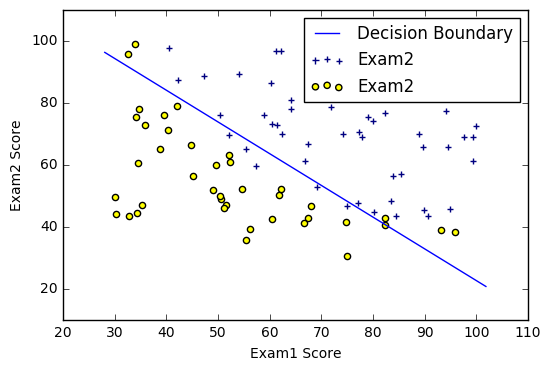

In [263]:
# plot decision boundary:
#fit_line = theta_learned[0] + theta_learned[1]*exam1 + theta_learned[2]*exam2

# pick min and max points to make a line
plot_x = np.array([min(np.transpose(X)[1])-2, max(np.transpose(X)[1])+2])
# calculate boundary line
plot_y = (-1./theta_learned[2])*(theta_learned[0] + theta_learned[1]*plot_x)

plt.scatter(acc['Exam1'], acc['Exam2'], marker = '+', c = 'navy')   # accepted students
plt.scatter(den['Exam1'], den['Exam2'], marker = 'o', c = 'yellow') # denied students
plt.plot(plot_x, plot_y, label = 'Decision Boundary')

plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend()

### 1.2.4 Evaluating logistic regression

In [274]:
# What are the odds that a student with scores E1 = 45, E2 = 85 is accepted?
student = np.array([1,45,85])

prob = sigmoid(np.dot(student, theta_learned))
prob

0.77629159041124107

In [342]:
def predict(X, y, theta_learned):
    m = y.size
    prob = sigmoid(np.dot(X, theta_learned))
    predicted = np.zeros(m)

    predicted[prob > 0.5] = 1
    predicted[prob <= 0.5] = 0
    
    # calculate the number of entries in 'predicted' that match the observed (y)
    accuracy = np.sum(predicted == y[:,0])/float(y.size) * 100.0
    return "The training accuracy of our classifier is: " + str(accuracy) + "%"

print predict(X,y, theta_learned)

The training accuracy of our classifier is: 89.0%


## 2. Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance. 

### 2.1 Visualizing the data

In [346]:
data2df = pd.read_csv('/Users/tess/Desktop/MachineLearning/machine-learning-ex2/ex2/ex2data2.txt', header = None, names = ['Test1', 'Test2', 'Pass?'])

In [349]:
data2df[0:10]

,Test1,Test2,Pass?
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


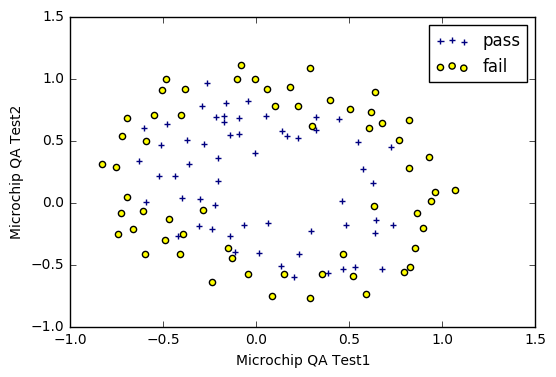

In [359]:
data2pass = data2df.loc[data2df['Pass?'] == 1]
data2fail = data2df.loc[data2df['Pass?'] == 0]

plt.scatter(data2pass['Test1'], data2pass['Test2'], marker = '+', c = 'navy', label = "pass" )
plt.scatter(data2fail['Test1'], data2fail['Test2'], marker = 'o', c = 'yellow', label = 'fail' )

plt.legend()
plt.xlabel('Microchip QA Test1')
plt.ylabel('Microchip QA Test2')

## 2.2 Feature mapping

Clearly, this data cannot be distinguished using a linear decision boundary.
Let's create additional higher dimensional features to accomodate the nonlinear boundary

In [415]:
data2 = np.loadtxt('/Users/tess/Desktop/MachineLearning/machine-learning-ex2/ex2/ex2data2.txt', delimiter = ',', unpack = True)

X = np.array(data2[:-1].T)          # split data into features
y = np.array(data2[-1:]).T          # split data into response variable

X.shape, y.shape

((118, 2), (118, 1))

In [407]:
# map all polynomial terms of x1 and x2 up to the sixth polynomial term

def mapFeature(X1,X2):
    
    degree = 6
    out = np.ones((X1.shape[0], 1))
    
    for i in range(1,degree+1):
        for j in range(0, i+1):
            first  = X1 ** (i-j)
            second = X2 ** (j)
            total = (first * second).reshape( first.shape[0], 1)
            out = np.hstack((out, total))
    return out
        

# expecting a 118 X 28 size feature vector
expandedX = mapFeature(X[:,0], X[:,1])
expandedX.shape        

(118, 28)

In [438]:
theta = np.zeros((expandedX.shape[1],1))
theta.shape

(28, 1)

## 2.3 Cost function and gradient

In [463]:
# do not regularize theta0, but do regularize theta1 --> 27


def regLogistCostFunction(theta, X, y, lamb):
    J = 0                           # initialize cost function as 0
    m = y.size
    h = sigmoid(np.dot(X, theta))

    J = -1*(1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (lamb/(2.*m))*np.sum(np.square(theta[1:]))
    return J

cost = regLogistCostFunction(theta, expandedX, y, 1)
cost

array([[ 0.69314718]])

### 2.3.1 Learning parameters using fmin

similar to above, use scipy's optimize function to learn optimal thetas

In [440]:
def regLearnParameters(theta, X, y, lamb):
    fmin = optimize.fmin(regLogistCostFunction, x0 = theta, args = (X, y, lamb), maxiter = 100000, full_output= True )
    return fmin[0], fmin[1]

fmin_theta, fmin_mincost = regLearnParameters(theta, expandedX, y, 1)

Optimization terminated successfully.
         Current function value: 0.383991
         Iterations: 17865
         Function evaluations: 21268


In [441]:
theta_learned, fmin_mincost

(array([  3.60728532,   0.48651444,   3.39313423, -10.48586115,
         -3.8897711 ,  -8.18067859,   6.68822799, -10.9122489 ,
          4.28103204,   6.15353086,   8.23485288,  13.57470272,
          3.32674198, -36.61333742,   0.08384434,  -7.22859564,
          8.97390944, -13.51121532,  19.26115414,  19.70048973,
         -4.73563146,  -5.89004029,  -5.41967127, -20.91988601,
         16.52773228,  -4.52406175,  16.60588311,  -4.98782047]),
 0.38399121138393721)

In [447]:
# could also try 'minimize' function

def optimizeRegularizedTheta(theta,expandedX,y,lamb):
    result = optimize.minimize(regLogistCostFunction, theta, args=(expandedX, y, lamb ),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
optim_theta, optim_mincost = optimizeRegularizedTheta(theta,expandedX,y,1)

In [448]:
optim_theta, optim_mincost

(array([[   19.60716942,    31.82358694,    16.07786299,  -191.19760098,
           -83.62199519,   -99.45350906,  -233.41239851,  -193.88971088,
          -126.30523795,   -40.28084627,   655.65855742,   498.93716879,
           811.57922661,   332.86845758,   180.83500598,   397.31425815,
           516.80133104,   613.06140011,   355.52626239,   127.29194489,
            35.26473227,  -765.88280196,  -892.93457056, -1497.75974437,
         -1029.12242866, -1010.50641115,  -376.33569109,  -122.77367452]]),
 0.24861289819749313)

## 2.4 Plotting the decision boundary

In [459]:
def plotBoundary(theta):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
# Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            tempij = mapFeature(np.array([u[i]]), np.array([v[j]]))
            z[i][j] = np.dot(theta, tempij.T)
        
    z = z.T 
    uval, vval = np.meshgrid(u, v)
    contour = plt.contour(u, v, z, [0])
    plt.clabel(contour, inline = 1)
    plt.title('decision boundary')


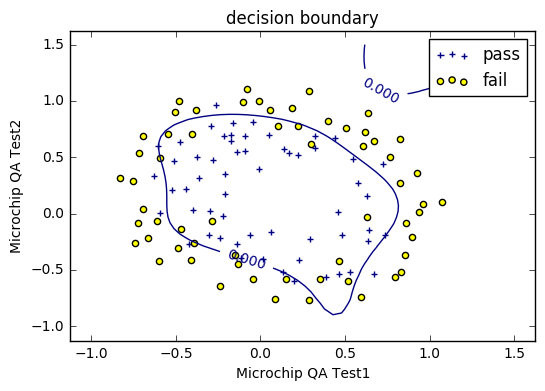

In [460]:
plt.scatter(data2pass['Test1'], data2pass['Test2'], marker = '+', c = 'navy', label = "pass" )
plt.scatter(data2fail['Test1'], data2fail['Test2'], marker = 'o', c = 'yellow', label = 'fail' )

plt.legend()
plt.xlabel('Microchip QA Test1')
plt.ylabel('Microchip QA Test2')
plotBoundary(fmin_theta)

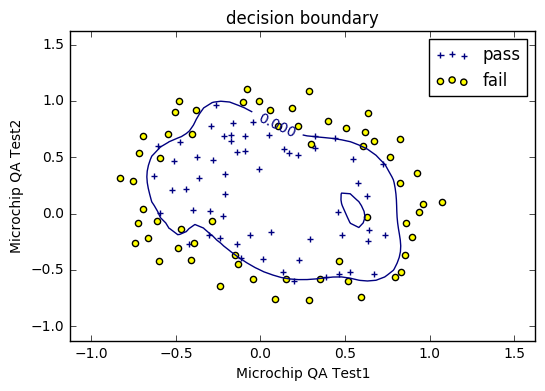

In [461]:
plt.scatter(data2pass['Test1'], data2pass['Test2'], marker = '+', c = 'navy', label = "pass" )
plt.scatter(data2fail['Test1'], data2fail['Test2'], marker = 'o', c = 'yellow', label = 'fail' )

plt.legend()
plt.xlabel('Microchip QA Test1')
plt.ylabel('Microchip QA Test2')
plotBoundary(optim_theta)